In [13]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [14]:
%cd test

/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges/test


## random textures

1.618 11
(6, 1024, 1)


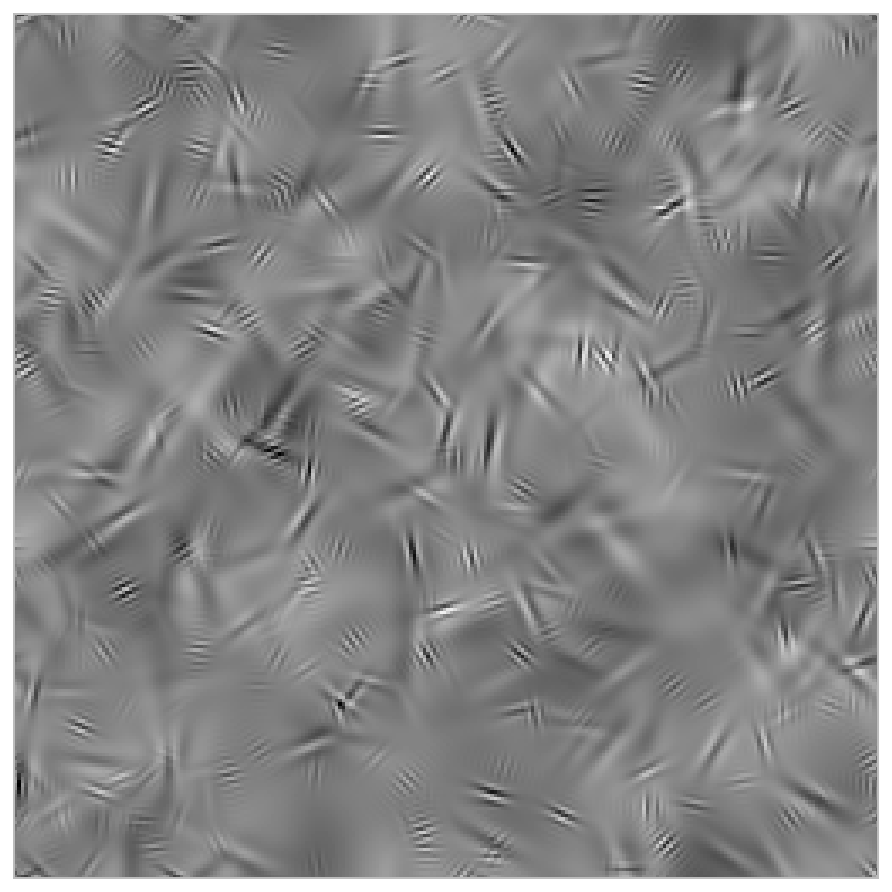

In [15]:
from SparseEdges import SparseEdges
mp = SparseEdges('https://raw.githubusercontent.com/meduz/SparseEdges/master/default_param.py')

mp.pe.N = 1024

mp.pe.N_image = 1
print mp.pe.base_levels, mp.n_levels
edgeslist = np.zeros((6, mp.pe.N, mp.pe.N_image))
edgeslist[0, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[1, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[2, :, :] = (np.pi* np.random.rand(mp.pe.N, mp.pe.N_image) ) % np.pi
#edgeslist[3, :, :] =  mp.sf_0[np.random.randint(mp.sf_0.size, size=(pe.N, pe.N_image))] # best would be to have more high frequency components
edgeslist[3, :, :] =  np.ceil(mp.pe.base_levels**(mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))/mp.pe.base_levels**(mp.n_levels)
edgeslist[4, :, :] = np.random.randn(mp.pe.N, mp.pe.N_image)
edgeslist[5, :, :] = 2*np.pi*np.random.rand(mp.pe.N, mp.pe.N_image)
print (edgeslist.shape)
image_rec = mp.reconstruct(edgeslist[:,:,0])
image_rec /= image_rec.std()
fig, a = mp.show_edges(np.empty((6,0)), image=image_rec, color='toto', show_phase=False) #

-8.01565020763 6.69643148754


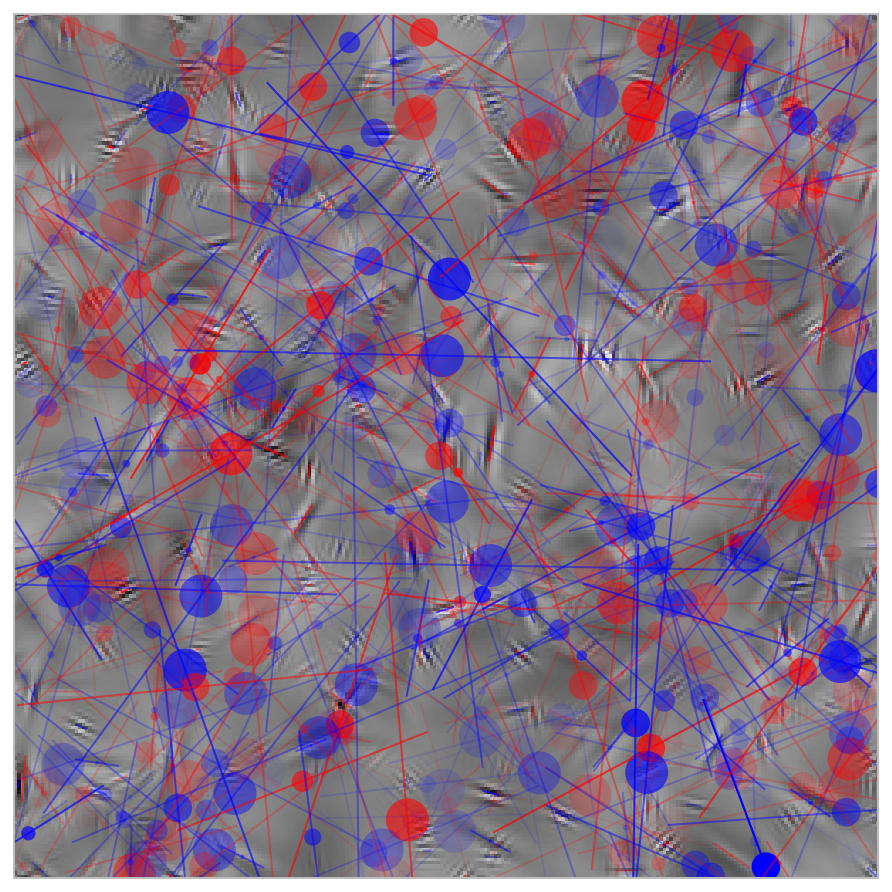

In [16]:
fig, a = mp.show_edges(edgeslist[:,:,0], image=image_rec, color='toto', show_phase=False) #
print image_rec.min(), image_rec.max()

[ 0.62  0.38  0.24  0.15  0.09  0.06  0.03  0.02  0.01  0.01  0.01]
11


(array([  19.,   21.,   31.,   28.,   32.,   45.,   48.,   82.,  129.,  589.]),
 array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
         0.45,  0.5 ]),
 <a list of 10 Patch objects>)

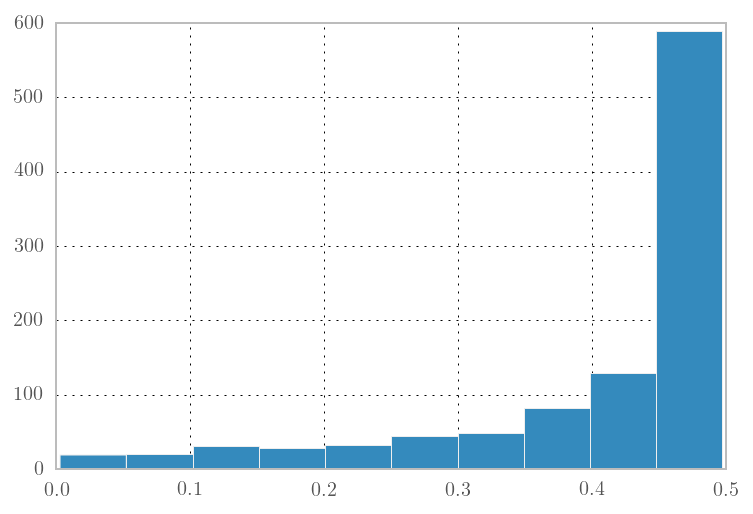

In [17]:
print mp.sf_0
print mp.n_levels
scales = 0.5 * (1- mp.pe.base_levels**(-mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))#/mp.pe.base_levels**(mp.n_levels)
plt.hist(scales)

In [18]:
mp.sf_0[np.random.randint(mp.sf_0.size, size=(4, 5))]

array([[ 0.02,  0.24,  0.01,  0.15,  0.03],
       [ 0.01,  0.02,  0.09,  0.38,  0.01],
       [ 0.06,  0.01,  0.01,  0.03,  0.01],
       [ 0.01,  0.03,  0.01,  0.09,  0.09]])

1.618 11
(6, 1024, 1)
-8.98506363339 12.1475458946


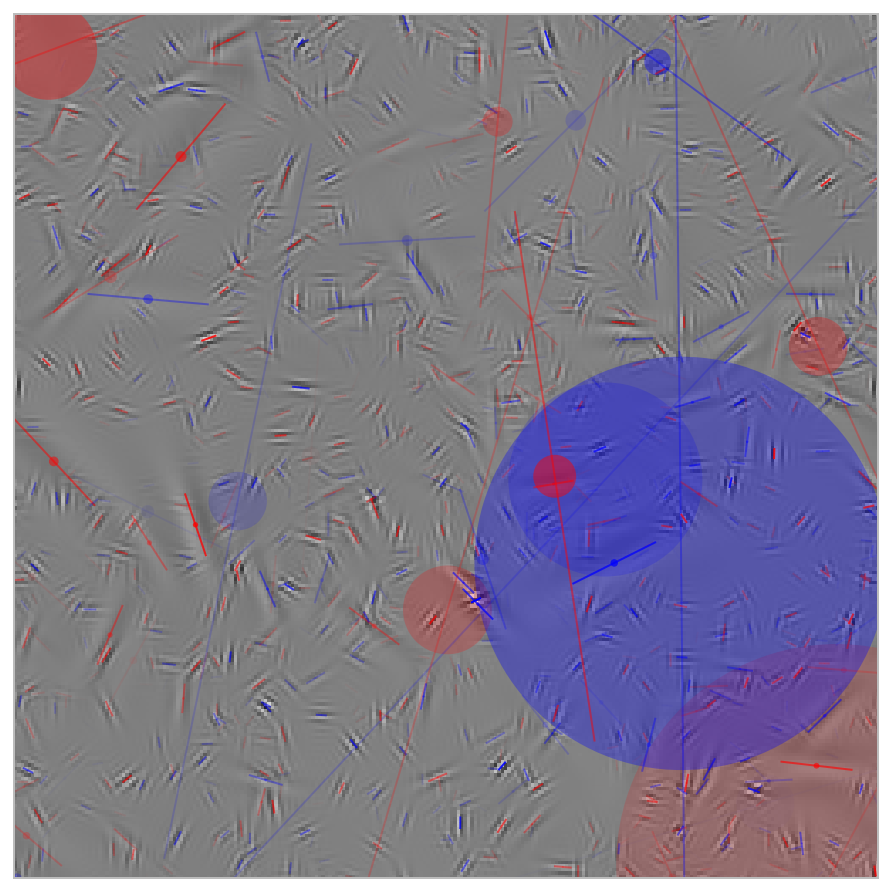

In [19]:
import matplotlib
#matplotlib.rcParams.update({'font.size': 18, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})
matplotlib.rcParams.update({'font.size': 18, 'text.usetex': True})
%matplotlib inline
%config InlineBackend.figure_format='retina'
import matplotlib.pyplot as plt

mp.pe.N = 1024

mp.pe.N_image = 1
print mp.pe.base_levels, mp.n_levels
edgeslist = np.zeros((6, mp.pe.N, mp.pe.N_image))
edgeslist[0, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[1, :, :] = mp.pe.N_X * np.random.rand(mp.pe.N, mp.pe.N_image)
edgeslist[2, :, :] = (np.pi* np.random.rand(mp.pe.N, mp.pe.N_image) ) % np.pi
#edgeslist[3, :, :] =  mp.sf_0[np.random.randint(mp.sf_0.size, size=(pe.N, pe.N_image))] # best would be to have more high frequency components
edgeslist[3, :, :] =  0.5 * (1- mp.pe.base_levels**(-mp.n_levels*(np.random.rand(mp.pe.N, mp.pe.N_image))))
edgeslist[4, :, :] = np.random.randn(mp.pe.N, mp.pe.N_image)
edgeslist[5, :, :] = 2*np.pi*np.random.rand(mp.pe.N, mp.pe.N_image)
print (edgeslist.shape)
image_rec = mp.reconstruct(edgeslist[:,:,0])
image_rec /= image_rec.std()
fig, a = mp.show_edges(edgeslist[:,:,0], image=image_rec, color='toto', show_phase=False) #
print image_rec.min(), image_rec.max()

## bonus: generating an unique seed for a given filename

In [20]:
imagelist, edgeslist, RMSE = mp.process(exp='testing_vanilla', name_database='serre07_distractors')
#print imagelist
# take one instance:
filename, croparea  = imagelist[0]
print (filename,croparea, filename+str(croparea))
import os
import hashlib
str_ = filename+str(croparea)
hashlib.sha224(str_).hexdigest()

INFO:SLIP: > computing edges for experiment testing_vanilla with database serre07_distractors 
INFO:SLIP:>>> For the class serre07_distractors, in experiment testing_vanilla RMSE = 0.059570 


('Hda_int314.jpg', [0, 256, 0, 256], 'Hda_int314.jpg[0, 256, 0, 256]')


'7eb9c7430d2685cbd1e7e4c1bc99a21dcb1269d46badfe01f9e01d98'

In [21]:
int("0x" +  hashlib.sha224(filename+str(croparea)).hexdigest(), 0)

13345773537573383921860374900392432693879257946125753694236063047064L

In [22]:
np.random.seed(seed=int("0x" +  hashlib.sha224(filename+str(croparea)).hexdigest(), 0) % 4294967295)

In [23]:
%cd ..

/Users/lolo/pool/science/BICV-book/SI_BICV_sparse/SparseEdges
